## Bibliotecas

## Nota: Ideal para conjuntos grandes o pequeños

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer dataset

In [3]:
dataset = pd.read_csv("../../Scrapping/Datos.csv")
dataset.head()

,Nombre,Calidad,Recomiendan,Dificultad
0,,0.0,NaN,10.0
1,Aunque Me Borren Seguiré *A Todos Los Pseudoal...,3.8,18.0,5.8
2,Fanny Adan Sosa,8.5,86.0,1.9
3,Rafael Aguilar García,7.7,82.0,2.4
4,Fernando Aguilar Sanchez,8.4,85.0,1.9


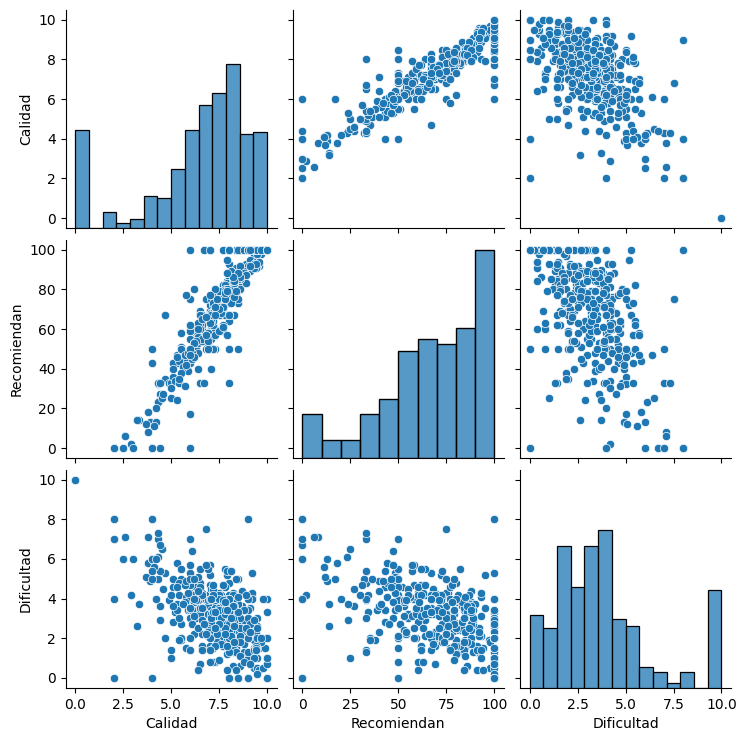

In [4]:
import seaborn as sns

sns.pairplot(dataset)

## Determinar rasgos

In [5]:
x = dataset.iloc[:, [1,3]].values

## Método del codo

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    # Crear objeto de la clase KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)

    # Entrenar el modelo
    kmeans.fit(x)

    # Calcular el WCSS
    wcss.append(kmeans.inertia_)

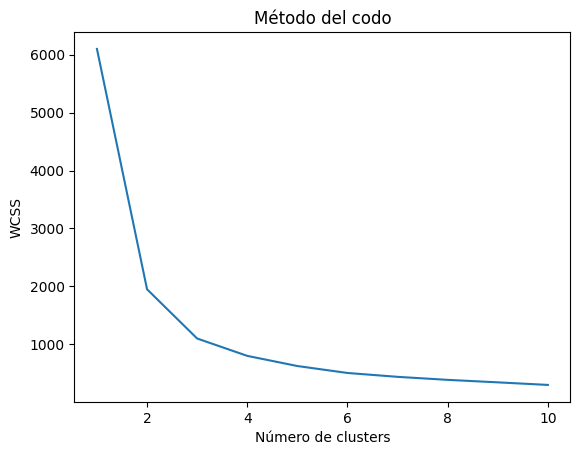

In [7]:
# --> Graficar resultados de clustering

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## Seguir con proceso de clustering

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([2, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 0, 1, 2, 1, 0, 1, 3, 1,
       2, 1, 3, 1, 2, 3, 1, 1, 1, 0, 3, 1, 2, 1, 0, 3, 3, 3, 1, 2, 2, 0,
       3, 1, 1, 1, 2, 3, 0, 3, 2, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 2, 0, 0,
       0, 1, 1, 3, 3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 1, 1, 2, 0, 1, 1,
       3, 0, 2, 1, 1, 1, 2, 3, 1, 0, 2, 1, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3,
       1, 2, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 2, 3, 1, 0, 1, 3, 1, 3, 0, 3, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 0, 0, 1, 3, 3, 3, 1, 1, 3, 1, 2,
       1, 1, 1, 0, 0, 1, 3, 1, 1, 1, 1, 3, 0, 1, 3, 3, 2, 0, 3, 3, 2, 3,
       3, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3, 3, 0, 1, 1, 3, 1, 2, 1, 3, 1, 0,
       1, 0, 1, 3, 1, 1, 1, 3, 1, 0, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 0, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 0, 1, 1, 3, 3,
       0, 3, 2, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 3, 3,

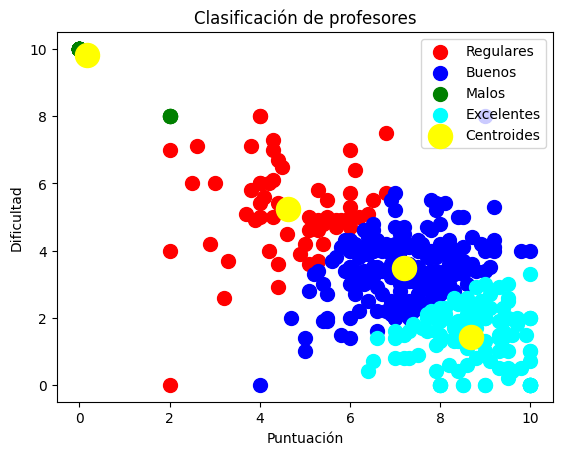

In [27]:
# Toma las coordenadas de los clientes y los agrupa en 5 grupos
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Regulares')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Buenos')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Malos')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Excelentes')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Regulares')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clasificación de profesores')
plt.xlabel('Puntuación')
plt.ylabel('Dificultad')
plt.legend()
plt.show()

## Estadísticas

In [15]:
Cluster_0 = x[y_kmeans == 0]
Cluster_1 = x[y_kmeans == 1]
Cluster_2 = x[y_kmeans == 2]
Cluster_3 = x[y_kmeans == 3]
# Cluster_4 = x[y_kmeans == 4]

print(f"Regulares: \t{len(Cluster_0)}")
print(f"Buenos: \t{len(Cluster_1)}")
print(f"Malos: \t\t{len(Cluster_2)}")
print(f"Excelentes: \t{len(Cluster_3)}")
# print(f"Regulares: \t{len(Cluster_4)}")




Regulares: 	60
Buenos: 	192
Malos: 		47
Excelentes: 	121


## Crear dataframe

In [23]:
lista_categorias = []
for i in y_kmeans:
    if i == 0:
        lista_categorias.append('Regular')
    elif i == 1:
        lista_categorias.append('Bueno')
    elif i == 2:
        lista_categorias.append('Malo')
    elif i == 3:
        lista_categorias.append('Excelente')
    # elif i == 4:
    #     lista_categorias.append('Regulare')


In [25]:
# Crear dataframe
df = pd.DataFrame(data=dataset['Nombre'], columns=['Nombre'])

# Añadir columna nueva
df['Puntuación'] = x[:, 0]
df['Dificultad'] = x[:, 1]
df['Categoria numerica'] = y_kmeans
df['Categoria'] = lista_categorias

# Mostrar dataframe
df.head()

,Nombre,Puntuación,Dificultad,Categoria numerica,Categoria
0,,0.0,10.0,2,Malo
1,Aunque Me Borren Seguiré *A Todos Los Pseudoal...,3.8,5.8,0,Regular
2,Fanny Adan Sosa,8.5,1.9,3,Excelente
3,Rafael Aguilar García,7.7,2.4,1,Bueno
4,Fernando Aguilar Sanchez,8.4,1.9,3,Excelente


## Exportar información

In [26]:
df.to_csv('../datasets_creados/data_kmeans.csv', index=False)